In [14]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import chi2
from scipy.stats import ncx2
from scipy.stats import norm as Gauss
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from scipy.interpolate import interp1d

In [15]:
# Parameter
xname = r"$\omega_b$"
xname_hat = r"$\hat\omega_b$"
xname_true = r"$\omega_{b, \mathrm{true}}$"

# Data 
x_hat = np.array([2.253547e-02 , 2.239948e-02 , 2.250087e-02 , 2.250191e-02 , 2.231446e-02 , 2.227799e-02 , 2.241640e-02 , 2.241520e-02 , 2.231122e-02 , 2.250541e-02 , 2.221899e-02 , 2.239040e-02 , 2.226332e-02 , 2.255921e-02 , 2.227819e-02 , 2.238759e-02 , 2.234449e-02 , 2.242780e-02 , 2.238202e-02 , 2.230839e-02 , 2.243395e-02 , 2.224803e-02 , 2.236212e-02 , 2.235452e-02 , 2.237362e-02 , 2.245599e-02 , 2.243074e-02 , 2.247376e-02 , 2.227720e-02 , 2.245777e-02 , 2.239738e-02 , 2.215682e-02 , 2.236045e-02 , 2.246800e-02 , 2.236598e-02 , 2.244807e-02 , 2.236324e-02 , 2.244958e-02 , 2.241361e-02 , 2.237631e-02 , 2.243862e-02 , 2.229250e-02 , 2.241878e-02 , 2.232026e-02 , 2.231993e-02 , 2.236549e-02 , 2.234848e-02 , 2.253240e-02 , 2.251788e-02 , 2.227134e-02 , 2.254480e-02 , 2.233564e-02 , 2.224745e-02 , 2.232392e-02 , 2.237564e-02 , 2.246204e-02 , 2.235900e-02 , 2.242144e-02 , 2.235671e-02 , 2.246244e-02 , 2.243087e-02 , 2.235928e-02 , 2.249592e-02 , 2.239389e-02 , 2.234274e-02 , 2.240627e-02 , 2.238620e-02 , 2.241825e-02 , 2.240899e-02 , 2.239689e-02 , 2.224390e-02 , 2.235998e-02 , 2.231107e-02 , 2.241303e-02 , 2.235882e-02 , 2.233575e-02 , 2.235078e-02 , 2.236157e-02 , 2.244681e-02 , 2.234416e-02 , 2.230764e-02 , 2.235112e-02 , 2.232133e-02 , 2.232035e-02 , 2.254306e-02 , 2.232307e-02 , 2.244869e-02 , 2.231640e-02 , 2.235968e-02 , 2.240930e-02 , 2.241141e-02 , 2.239291e-02 , 2.233511e-02 , 2.232606e-02 , 2.249624e-02 , 2.233790e-02 , 2.240847e-02 , 2.231131e-02 , 2.222555e-02 , 2.222544e-02 , 2.240580e-02 , 2.247951e-02 , 2.236955e-02 , 2.242122e-02 , 2.246307e-02 , 2.236259e-02 , 2.232013e-02 , 2.235372e-02 , 2.229830e-02 , 2.235694e-02 , 2.243897e-02 , 2.229875e-02 , 2.240061e-02 , 2.234812e-02 , 2.246865e-02 , 2.239067e-02 , 2.238966e-02 , 2.244847e-02 , 2.238252e-02 , 2.241844e-02 , 2.233049e-02 , 2.235348e-02 , 2.236558e-02 , 2.227380e-02 , 2.247378e-02 , 2.244305e-02 , 2.235994e-02 , 2.245258e-02 , 2.240831e-02 , 2.240278e-02 , 2.244237e-02 , 2.238822e-02 , 2.231902e-02 , 2.231997e-02 , 2.242756e-02 , 2.247696e-02 , 2.235088e-02 , 2.243725e-02 , 2.235918e-02 , 2.240915e-02 , 2.225302e-02 , 2.246020e-02 , 2.239080e-02 , 2.244449e-02 , 2.242573e-02 , 2.241884e-02 , 2.242137e-02 , 2.240633e-02 , 2.235711e-02 , 2.242455e-02 , 2.231084e-02 , 2.220642e-02 , 2.238352e-02 , 2.240054e-02 , 2.234768e-02 , 2.242613e-02 , 2.238617e-02 , 2.239067e-02 , 2.240392e-02 , 2.233397e-02 , 2.234371e-02 , 2.242162e-02 , 2.236809e-02 , 2.243889e-02 , 2.249241e-02 , 2.224949e-02 , 2.229513e-02 , 2.234840e-02 , 2.232110e-02 , 2.237131e-02 , 2.234160e-02 , 2.252662e-02 , 2.244363e-02 , 2.243163e-02 , 2.238813e-02 , 2.239105e-02 , 2.248795e-02 , 2.256793e-02 , 2.239773e-02 , 2.240727e-02 , 2.231496e-02 , 2.243055e-02 , 2.243129e-02 , 2.250990e-02 , 2.236032e-02 , 2.240701e-02 , 2.227838e-02 , 2.241858e-02 , 2.245258e-02 , 2.235689e-02 , 2.247426e-02 , 2.246572e-02 , 2.245275e-02 , 2.243604e-02 , 2.228853e-02 , 2.251317e-02 , 2.237280e-02 , 2.251729e-02 , 2.250493e-02 , 2.244862e-02 , 2.233862e-02 , 2.238144e-02 , 2.255828e-02 , 2.241167e-02 , 2.229834e-02 , 2.233150e-02 , 2.231143e-02 , 2.253500e-02 , 2.240434e-02 , 2.236007e-02 , 2.242441e-02 , 2.247864e-02 , 2.232248e-02 , 2.245889e-02 , 2.237833e-02 , 2.236077e-02 , 2.240531e-02 , 2.239703e-02 , 2.238275e-02 , 2.231686e-02 , 2.235711e-02 , 2.237793e-02 , 2.247097e-02 , 2.253841e-02 , 2.246596e-02 , 2.228344e-02 , 2.223529e-02 , 2.241291e-02 , 2.233283e-02 , 2.233206e-02 , 2.239898e-02 , 2.240726e-02 , 2.239685e-02 , 2.235396e-02 , 2.230459e-02 , 2.232883e-02 , 2.239997e-02 , 2.248325e-02 , 2.242506e-02 , 2.232636e-02 , 2.228242e-02 , 2.245226e-02 , 2.228733e-02 , 2.232322e-02 , 2.249255e-02 , 2.243762e-02 , 2.238765e-02 , 2.234536e-02 , 2.234489e-02 , 2.243611e-02])
lnL_hat = -np.array([337.05, 302.99, 283.08, 347.32, 308.20, 297.32, 291.75, 303.31, 301.28, 333.26, 303.32, 331.26, 307.08, 332.99, 310.26, 327.52, 294.59, 282.65, 315.27, 300.00, 318.42, 300.79, 275.41, 324.40, 331.11, 339.60, 306.66, 300.37, 291.08, 301.40, 308.61, 303.12, 302.40, 281.24, 304.80, 300.42, 292.95, 285.65, 310.47, 317.57, 306.68, 321.68, 294.83, 300.06, 304.91, 307.13, 330.41, 310.61, 299.79, 308.69, 303.93, 331.52, 281.93, 284.55, 298.73, 304.09, 288.45, 297.97, 312.23, 314.99, 316.50, 307.86, 328.01, 302.66, 289.88, 309.75, 293.95, 287.75, 307.79, 286.70, 311.08, 295.96, 316.06, 312.89, 308.29, 315.06, 298.26, 290.44, 320.69, 270.68, 305.93, 269.17, 308.35, 293.59, 331.98, 323.04, 310.68, 282.50, 324.37, 300.08, 334.14, 321.68, 302.04, 295.18, 308.16, 298.40, 270.45, 300.12, 316.70, 292.68, 300.88, 296.08, 315.49, 317.55, 306.96, 298.85, 320.19, 337.19, 293.44, 292.33, 287.24, 294.52, 286.96, 306.99, 291.68, 296.25, 315.53, 308.80, 333.46, 290.77, 315.31, 275.97, 333.62, 298.19, 340.22, 298.27, 284.54, 299.73, 302.35, 329.94, 310.69, 294.62, 309.56, 262.47, 316.88, 296.19, 289.78, 286.15, 311.54, 309.65, 302.95, 296.06, 304.03, 282.07, 311.46, 285.73, 292.98, 300.96, 311.21, 355.87, 308.08, 303.14, 291.99, 260.84, 297.73, 301.04, 277.21, 297.50, 271.63, 304.45, 315.47, 308.27, 313.29, 345.00, 295.72, 282.88, 290.39, 310.69, 334.31, 276.59, 317.70, 311.34, 285.96, 273.37, 303.53, 321.24, 322.17, 319.57, 275.86, 329.79, 258.87, 305.81, 317.67, 299.39, 318.58, 291.00, 275.22, 300.66, 291.41, 332.57, 310.26, 325.35, 340.46, 297.69, 318.78, 323.18, 342.96, 296.83, 279.10, 280.03, 341.80, 292.57, 307.67, 326.93, 314.60, 314.33, 296.54, 342.57, 267.43, 302.38, 310.12, 297.53, 307.89, 308.37, 308.64, 345.30, 304.77, 308.64, 300.14, 305.85, 285.46, 279.89, 306.11, 320.39, 315.17, 281.37, 313.42, 313.91, 310.02, 320.25, 300.99, 318.18, 311.97, 292.25, 306.67, 293.40, 300.26, 321.51, 315.81, 311.13, 304.68, 296.95, 313.64, 291.84, 302.60, 299.12, 297.33, 315.59, 297.35, 321.29])
lnL_tru = -np.array([339.32, 303.05, 284.36, 348.57, 308.61, 298.42, 291.89, 303.42, 301.68, 334.67, 305.84, 331.29, 308.55, 335.95, 311.30, 327.54, 294.77, 282.85, 315.29, 300.50, 318.66, 302.42, 275.45, 324.47, 331.12, 340.12, 306.92, 301.12, 292.05, 301.96, 308.64, 307.71, 302.87, 281.90, 304.85, 300.85, 293.02, 286.08, 310.59, 317.58, 307.05, 322.50, 294.96, 300.39, 305.27, 307.18, 330.56, 312.68, 301.55, 309.94, 306.19, 331.74, 283.73, 284.86, 298.75, 304.70, 288.61, 298.14, 312.29, 315.58, 316.74, 307.93, 329.23, 302.69, 290.04, 309.83, 293.97, 287.91, 307.87, 286.73, 313.02, 296.01, 316.52, 312.97, 308.32, 315.32, 298.34, 290.48, 321.09, 270.81, 306.46, 269.29, 308.72, 293.96, 334.46, 323.37, 311.02, 282.92, 324.43, 300.16, 334.24, 321.71, 302.22, 295.50, 309.44, 298.59, 270.52, 300.58, 319.04, 295.03, 300.94, 296.94, 315.52, 317.71, 307.53, 298.91, 320.61, 337.27, 294.13, 292.42, 287.47, 295.11, 287.00, 307.15, 292.27, 296.27, 315.55, 309.17, 333.47, 290.89, 315.55, 276.04, 333.69, 299.51, 340.92, 298.59, 284.57, 300.13, 302.44, 329.98, 311.05, 294.63, 309.93, 262.87, 317.06, 296.98, 289.88, 286.43, 311.60, 309.75, 304.49, 296.62, 304.05, 282.43, 311.64, 285.89, 293.14, 301.01, 311.27, 356.00, 308.58, 305.94, 292.00, 260.87, 297.85, 301.21, 277.21, 297.51, 271.67, 304.68, 315.61, 308.42, 313.31, 345.24, 296.77, 284.51, 291.19, 310.78, 334.64, 276.63, 317.86, 313.13, 286.30, 273.55, 303.55, 321.26, 323.18, 322.64, 275.89, 329.85, 259.33, 306.00, 317.91, 300.92, 318.63, 291.06, 276.17, 300.79, 291.89, 332.65, 311.09, 325.98, 340.92, 298.06, 319.59, 324.76, 342.97, 298.44, 280.42, 280.38, 341.99, 292.59, 310.48, 327.03, 315.18, 314.58, 297.10, 344.65, 267.49, 302.45, 310.32, 298.31, 308.22, 309.04, 308.65, 345.37, 304.83, 308.66, 300.15, 306.23, 285.52, 279.90, 306.83, 322.41, 315.79, 282.22, 315.39, 313.98, 310.29, 320.46, 301.02, 318.23, 312.00, 292.35, 307.27, 293.64, 300.30, 322.41, 315.93, 311.46, 305.62, 297.46, 314.47, 292.18, 303.74, 299.34, 297.34, 315.72, 297.51, 321.59])

# Asimov data set
xs_asimov   =   np.array([0.0198, 0.0199, 0.0220, 0.0221, 0.0223, 0.022383, 0.0225, 0.0226, 0.0227, 0.0228, 0.0229, 0.0230])
chi2_asimov = 2*np.array([634.20, 585.32,  13.59,   7.41,   0.64,     0.00,   1.26,   4.33,   9.24,  15.98,  24.53,  34.90])

# Compute likelihood ratio
LR = -2*(lnL_tru - lnL_hat)
print("max LR: ", np.max(LR))

max LR:  9.17999999999995


In [16]:
# histogram settings
bin_width = 0.5
bin_max = 12
bins = np.arange(0, bin_max, bin_width)
bins_fine = np.arange(0, bin_max, bin_width/10.)
N_LR = len(LR)
nbins = len(bins)
norm = bin_width*N_LR

# h settings
x_true = 0.022383
x_lim = 0.0004
x_bin_width = x_lim/10.
x_bins = np.arange(x_true-x_lim, x_true+x_lim, x_bin_width)
x_bins_fine = np.arange(x_true-x_lim, x_true+x_lim, x_bin_width/10.)
norm_x = x_bin_width*N_LR

In [17]:
# Set fonts
plt.rc('font',**{'family':'Helvetica','size':16})
plt.rc('text', usetex=True)
font = {'family':'Helvetica',
        'color' : 'black',
        'size'  :  16}

In [18]:
# Define a parabola
def parab(x, a,b,c):
    return a + b * (x-c)**2.

MLE:  0.022387380106634828
1 sigma:  7.266054911248855e-05


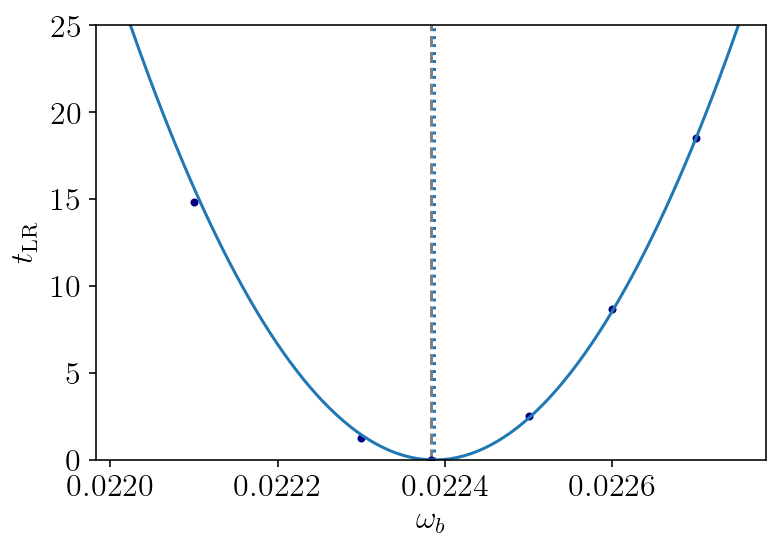

In [20]:
#### Compute Asimov error

#Fit parabola
[a,b,c], pcov = curve_fit(parab, xs_asimov, chi2_asimov, p0=[0.72, 1185714, 0.67], maxfev=30000)
fit_x = x_bins_fine
fit_y = b * (fit_x-c)**2.
parabola_min = a

# Find intersection of parabola with \Delta\chi^2 = 1
def parabola(x):
    return b * (x-c)**2. -1
print("MLE: ", c)
zeros = fsolve(parabola, x0=[0.0,5.])
sigma = (zeros[1]-zeros[0])/2.
print("1 sigma: ", sigma)
sigma_asimov = sigma

# Plot
plt.plot(xs_asimov, chi2_asimov, marker=".", ls="", color="navy")
plt.plot(fit_x, fit_y, color='tab:blue', ls='-')
plt.vlines(x_true, 0, 25, color="grey", ls="--")
plt.vlines(c, 0, 25, color="tab:blue", ls=":")
plt.hlines(1, 0.65, 0.70, color="tab:blue", ls=":")
plt.ylabel(r"$t_\mathrm{LR}$")
plt.xlabel(xname)
plt.ylim([0,25])
plt.xlim([x_true-x_lim, x_true+x_lim])

plt.show()

In [21]:
# Adapt h bin settings
x_lim = 4*sigma_asimov
x_bin_width = x_lim/10.
x_bins = np.arange(x_true-x_lim, x_true+x_lim, x_bin_width)
x_bins_fine = np.arange(x_true-x_lim, x_true+x_lim, x_bin_width/10.)
norm_x = x_bin_width*N_LR

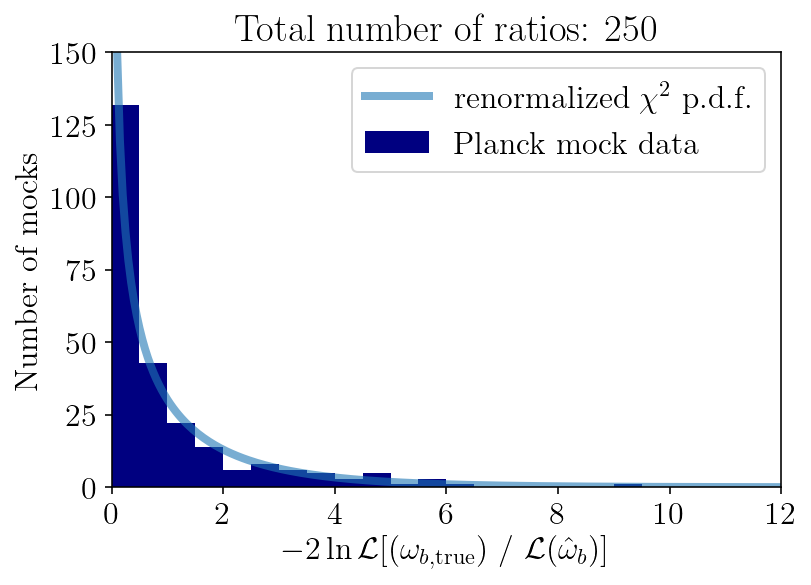

In [22]:
# Plot LR histogram
plt.hist(LR, bins=bins, color="navy", label="Planck mock data")
plt.plot(bins_fine, norm*chi2.pdf(bins_fine, df=1), color="tab:blue", lw=4, alpha=0.6, label=r'renormalized $\chi^2$ p.d.f.')
plt.xlim([0,bin_max])
plt.ylim([0,150])
plt.xlabel(r"$-2\ln\mathcal{L}$[("+xname_true+r") / {$\mathcal{L}$("+xname_hat+r")]")
plt.ylabel("Number of mocks")
plt.title("Total number of ratios: "+str(N_LR))
plt.legend()
plt.show()

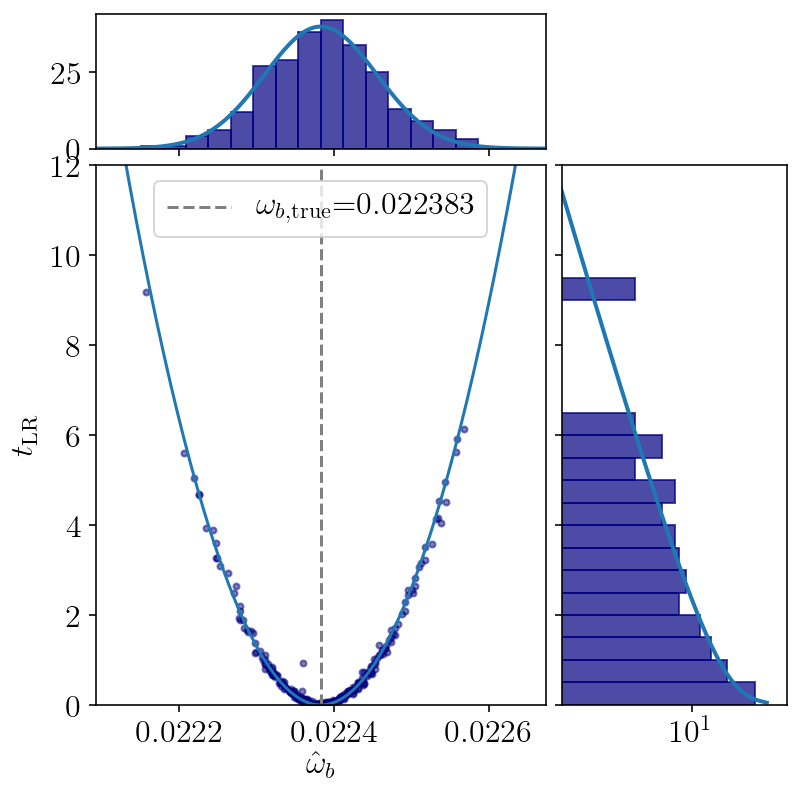

In [24]:
#### LR triangle plot
# Initialise plot
fig = plt.figure(figsize=(6, 6))
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 2), height_ratios=(1, 4), left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.05, hspace=0.05)
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)

# Center plot
ax.scatter(x_hat, LR, color="navy", marker=".", alpha=0.5)
ax.plot(x_bins_fine, (x_bins_fine-x_true)**2/sigma_asimov**2, color='tab:blue', ls='-')
ax.vlines(x_true, 0, bin_max, ls="--", color="grey", label=xname_true+r"$ = $"+str(x_true))
ax.set_xlim([x_true-x_lim, x_true+x_lim])
ax.set_ylim([0,bin_max])
ax.set_xlabel(xname_hat)
ax.set_ylabel(r"$t_\mathrm{LR}$")
ax.legend()

# Hist x
ax_histx.hist(x_hat, bins=x_bins, color="navy", alpha=0.7, edgecolor='navy')
ax_histx.plot(x_bins_fine, norm_x*Gauss.pdf(x_bins_fine, loc=x_true, scale=sigma_asimov), color='tab:blue', lw=2)

# Hist y
ax_histy.hist(LR, bins=bins, orientation='horizontal', color="navy", alpha=0.7, edgecolor='navy')
ax_histy.plot(norm*chi2.pdf(bins_fine, df=1), bins_fine, color='tab:blue', lw=2)
ax_histy.set_xlim([5e-2,5e2])
ax_histy.set_xscale("log")

plt.savefig("LR_hist_fixed_NP_omega_b.pdf", format="PDF")
plt.show()

In [25]:
# Find \Delta\chi^2 for which 68.27% of mocks are below
LR_cutoff = 0.91
print(100*np.count_nonzero(LR<LR_cutoff)/len(LR), "% of mocks below: ", LR_cutoff)

67.6 % of mocks below:  0.91


In [26]:
# Compare sigma_asimov and sigma_mocks:
print("sigma_asimov: ", sigma_asimov)
print("sigma_mocks: ", np.std(x_hat))

sigma_asimov:  7.266054911248855e-05
sigma_mocks:  7.285218733439915e-05
